In [63]:
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [64]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [65]:
import numpy as np

totalSales = {}
totalFreq = {}

for i in df.index:
    custName = df.loc[i, 'CUSTOMERNAME']
    
    if custName in totalSales.keys():
        presale = totalSales[custName]
        totalSales.update({custName:np.round(presale+df.loc[i, 'SALES'])})
    else:
        totalSales.update({custName:df.loc[i,'SALES']})
        
    if custName in totalFreq.keys():
        totalFreq.update({custName:totalFreq[custName]+1})
    else:
        totalFreq.update({custName:1})

print(totalFreq)

{'Land of Toys Inc.': 49, 'Reims Collectables': 41, 'Lyon Souveniers': 20, 'Toys4GrownUps.com': 30, 'Corporate Gift Ideas Co.': 41, 'Technics Stores Inc.': 34, 'Daedalus Designs Imports': 20, 'Herkku Gifts': 29, 'Mini Wheels Co.': 21, 'Auto Canal Petit': 27, 'Australian Collectors, Co.': 55, 'Vitachrome Inc.': 25, 'Tekni Collectables Inc.': 21, 'Gift Depot Inc.': 25, 'La Rochelle Gifts': 53, "Marta's Replicas Co.": 27, 'Toys of Finland, Co.': 30, 'Baane Mini Imports': 32, 'Diecast Classics Inc.': 31, 'Salzburg Collectables': 40, 'Souveniers And Things Co.': 46, 'FunGiftIdeas.com': 26, 'UK Collectables, Ltd.': 29, 'Euro Shopping Channel': 259, 'Volvo Model Replicas, Co': 19, 'Corrida Auto Replicas, Ltd': 32, 'Dragon Souveniers, Ltd.': 43, 'Classic Legends Inc.': 20, 'Australian Gift Network, Co': 15, 'Classic Gift Ideas, Inc': 21, 'Saveley & Henriot, Co.': 41, 'Canadian Gift Exchange Network': 22, 'West Coast Collectables Co.': 13, 'Cambridge Collectables Co.': 11, 'Super Scale Inc.': 1

In [66]:
a = pd.DataFrame()
b = a.assign(totalSales = list(totalSales.values()))
c = b.assign(totalFreq = list(totalFreq.values()))
df = c.assign(custName = list(totalSales.keys()))
df.head()

,totalSales,totalFreq,custName
0,164068.0,49,Land of Toys Inc.
1,135040.0,41,Reims Collectables
2,78570.0,20,Lyon Souveniers
3,104563.0,30,Toys4GrownUps.com
4,149881.0,41,Corporate Gift Ideas Co.


In [67]:
cols = df.columns.to_list()[0:2]
cols

['totalSales', 'totalFreq']

In [68]:
data = df[cols]

In [69]:
data = np.log(data)

In [71]:
data1 = data.to_numpy()


In [72]:
data1

array([[12.00803626,  3.8918203 ],
       [11.81332631,  3.71357207],
       [11.27174523,  2.99573227],
       [11.55754504,  3.40119738],
       [11.91759692,  3.71357207],
       [11.70175083,  3.52636052],
       [11.14264409,  2.99573227],
       [11.62303469,  3.36729583],
       [11.21824563,  3.04452244],
       [11.44220253,  3.29583687],
       [12.21103034,  4.00733319],
       [11.38555789,  3.21887582],
       [11.32931508,  3.04452244],
       [11.53169815,  3.21887582],
       [12.10140633,  3.97029191],
       [11.54325096,  3.29583687],
       [11.61952621,  3.40119738],
       [11.66649598,  3.4657359 ],
       [11.71288227,  3.4339872 ],
       [11.91706303,  3.68887945],
       [11.92880284,  3.8286414 ],
       [11.50210716,  3.25809654],
       [11.67852465,  3.36729583],
       [13.72371868,  5.55682806],
       [11.23525973,  2.94443898],
       [11.70036722,  3.4657359 ],
       [12.06100641,  3.76120012],
       [11.26183244,  2.99573227],
       [10.99319363,

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
data1 = scaler.fit_transform(data1)

In [75]:
data1

array([[ 1.03443579e+00,  1.15539023e+00],
       [ 7.07376066e-01,  8.47604691e-01],
       [-2.02332772e-01, -3.91906676e-01],
       [ 2.77733138e-01,  3.08219752e-01],
       [ 8.82522323e-01,  8.47604691e-01],
       [ 5.19959617e-01,  5.24341985e-01],
       [-4.19187554e-01, -3.91906676e-01],
       [ 3.87737925e-01,  2.49681122e-01],
       [-2.92197531e-01, -3.07659517e-01],
       [ 8.39891049e-02,  1.26291197e-01],
       [ 1.37541060e+00,  1.35484913e+00],
       [-1.11584624e-02, -6.59929805e-03],
       [-1.05631088e-01, -3.07659517e-01],
       [ 2.34317398e-01, -6.59929805e-03],
       [ 1.19127211e+00,  1.29088907e+00],
       [ 2.53722981e-01,  1.26291197e-01],
       [ 3.81844640e-01,  3.08219752e-01],
       [ 4.60741063e-01,  4.19659981e-01],
       [ 5.38657412e-01,  3.64838734e-01],
       [ 8.81625518e-01,  8.04967359e-01],
       [ 9.01345217e-01,  1.04629769e+00],
       [ 1.84612583e-01,  6.11240578e-02],
       [ 4.80945954e-01,  2.49681122e-01],
       [ 3.

In [76]:
from sklearn.cluster import KMeans

In [77]:
sse = {}
for i in range(1,21):
    model = KMeans(n_clusters = i, random_state = 1)
    model.fit(data1)
    sse[i] = model.inertia_

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [78]:
sse

{1: 184.00000000000003,
 2: 99.05824880428564,
 3: 56.27598135983131,
 4: 28.381603909806167,
 5: 17.706684447973082,
 6: 12.160493560407954,
 7: 7.545841914251411,
 8: 5.591845517262227,
 9: 4.48651543518824,
 10: 3.7005025866026293,
 11: 3.073828172763365,
 12: 2.730575669709893,
 13: 2.4589740628515013,
 14: 2.208847530938273,
 15: 2.090934654800015,
 16: 1.8215796209241264,
 17: 1.7186850835067342,
 18: 1.4592268183096986,
 19: 1.3800300897244506,
 20: 1.3348575847013129}

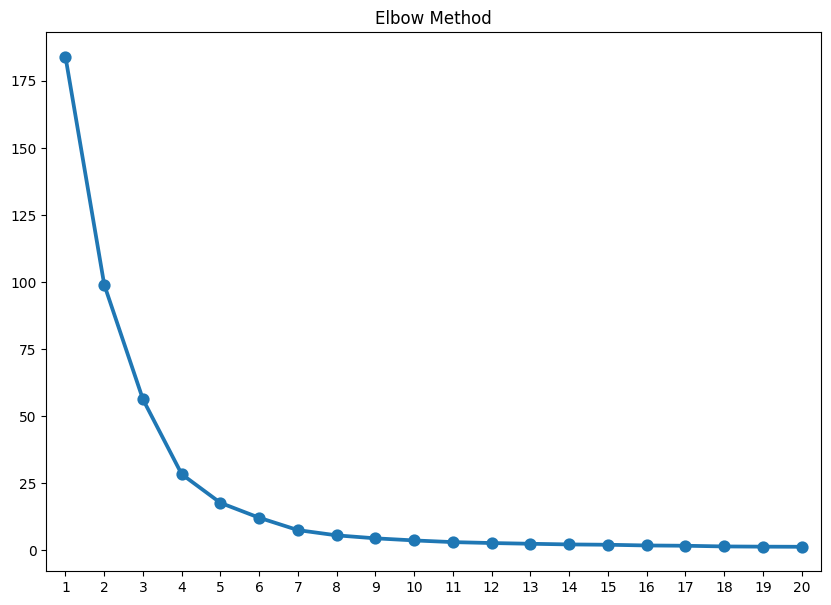

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
plt.title('Elbow Method')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [80]:
model = KMeans(n_clusters = 6, random_state = 1)
model.fit(data1)
clusterLabels = model.labels_
final = df.assign(Cluster = clusterLabels)
final

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,totalSales,totalFreq,custName,Cluster
0,164068.0,49,Land of Toys Inc.,1
1,135040.0,41,Reims Collectables,1
2,78570.0,20,Lyon Souveniers,0
3,104563.0,30,Toys4GrownUps.com,4
4,149881.0,41,Corporate Gift Ideas Co.,1
...,...,...,...,...
87,64592.0,23,"Australian Collectables, Ltd",0
88,57293.0,19,Gift Ideas Corp.,0
89,34994.0,14,"Bavarian Collectables Imports, Co.",3
90,33440.0,8,Royale Belge,3
